# ML Project 1

# Bank Marketing Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("bankmarketing.csv")
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
### Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [4]:
### Check the shape.
df.shape

(45211, 19)

In [5]:
### Check the unique value
df.nunique()

age            77
job            12
salary         11
marital         3
education       4
targeted        2
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
response        2
dtype: int64

In [54]:
### Check if there is any duplicated.
df[df.duplicated()]

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response


In [6]:
### Check for null values.
df.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

In [56]:
### There is no null values.

In [11]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


####  Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [7]:
df.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [13]:
## In mean and standard deviation wer see that 75% values of pdays are -1.
## so -1 has special meaning which is preivious campaign was made to them or not.
## so in our case if we want to decission on customer who did have campaign previously, then we must exclude all the case of -1.
## so, by doing this we can get to customer who had previously campaign.

In [9]:
print("mean of pdays:\n",df['pdays'].mean())
print("Minimum Values of pdays:\n",df['pdays'].min())
print("meadian of pdays:\n",df['pdays'].median())

mean of pdays:
 40.19782796222158
Minimum Values of pdays:
 -1
meadian of pdays:
 -1.0


#### Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?

In [14]:
df1 = df.copy()

In [15]:
df1.drop(df1[df1['pdays'] < 0].index, inplace = True)

In [16]:
df1.pdays.describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [17]:
print("mean of pdays:\n",df1['pdays'].mean())
print("meadian of pdays:\n",df1['pdays'].median())
print("Minimum values of pdays:\n",df1['pdays'].min())

mean of pdays:
 224.57769165556496
meadian of pdays:
 194.0
Minimum values of pdays:
 1


In [ ]:
## This time mean and median has changed significantly because we have remove the case where pdays values is -1 means 
## we have remove the customer hat were not contacted previously for campaign.

#### Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

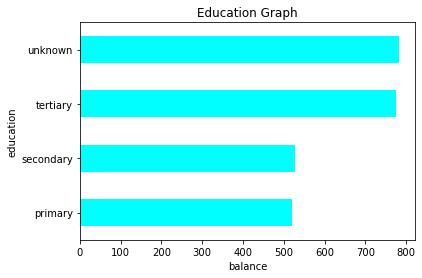

Unknown has highest median 782.0


In [19]:
plt.title('Education Graph')
plt.xlabel('balance')
df2 = df1.groupby(['education']).median()['balance']
df2.plot(kind = 'barh',color = 'cyan')
plt.show()

print('Unknown has highest median', df2.max())

####  Make a box plot for pdays. Do you see any outliers?

make boxplot to check the outliers on pdays


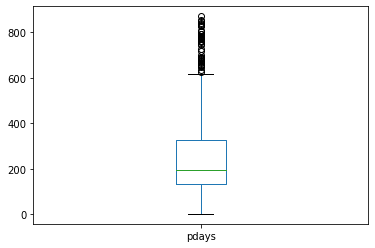

In [21]:
print('make boxplot to check the outliers on pdays')
df1.pdays.plot.box()
plt.show()

In [63]:
### Yes outliers are present on pdays column, so now handling the outliers.

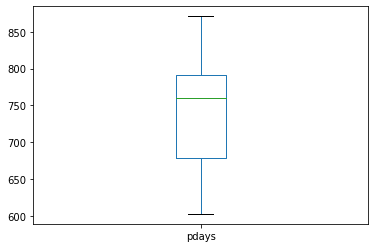

In [22]:
df2 =df1[df1['pdays'] >= 600]
df1= df1.drop(df2.index, axis=0)
df2.pdays.plot.box()
plt.show()

In [65]:
### So now there is no outliers.

### Bi-Variate Analysis
####  Convert the response variable to a convenient form

In [24]:
df1['response'] = np.where(df1['response'] == 'no',0, 1)

In [67]:
df1.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,0
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,1
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,1
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,0
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,1


####  Make suitable plots for associations with numerical features and categorical features’

In [25]:
cols = df1.columns.to_list()
num_cols = df1._get_numeric_data().columns.to_list()
cat_cols = list(set(cols) - set(num_cols))
print('Numerical Columns')
print(num_cols)
print('\nCategorical Columns')
print(cat_cols)

Numerical Columns
['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response']

Categorical Columns
['contact', 'marital', 'poutcome', 'housing', 'loan', 'month', 'job', 'education', 'targeted', 'default']


C:\Python new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


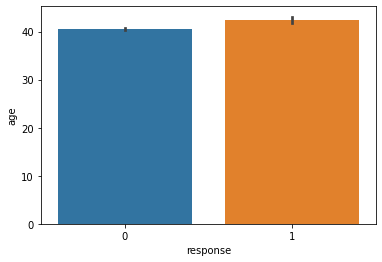

C:\Python new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


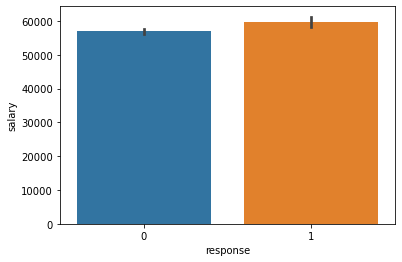

C:\Python new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


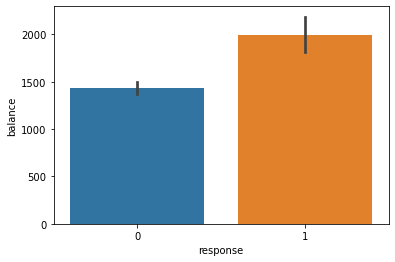

C:\Python new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


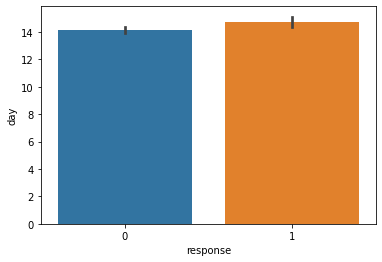

C:\Python new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


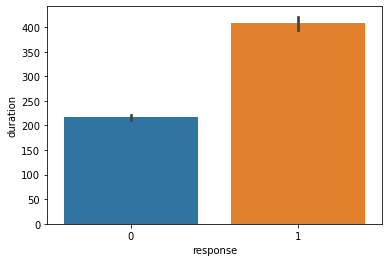

C:\Python new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


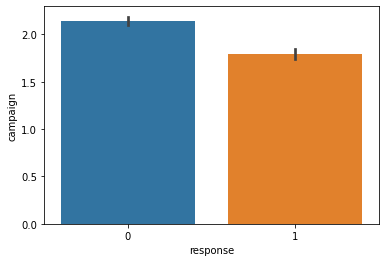

C:\Python new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


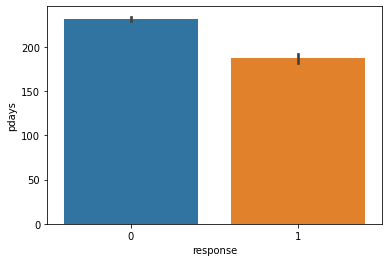

C:\Python new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


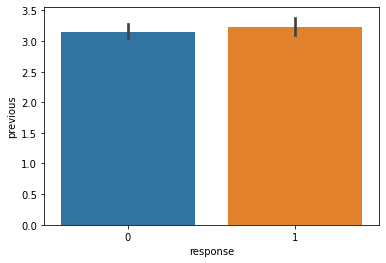

C:\Python new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


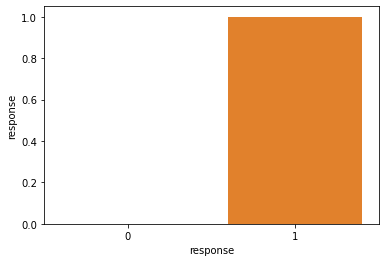

In [26]:
for i in df1[num_cols]:
    sns.barplot(df1['response'], df1[i])
    plt.show()

C:\Python new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


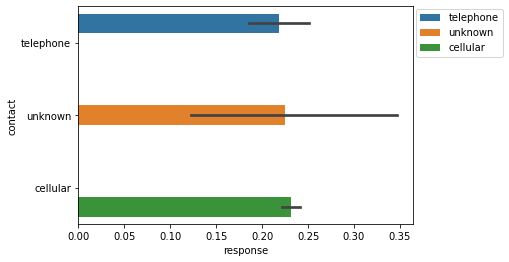

C:\Python new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


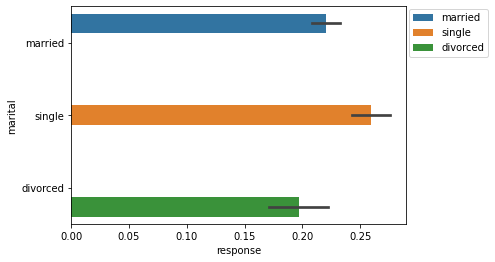

C:\Python new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


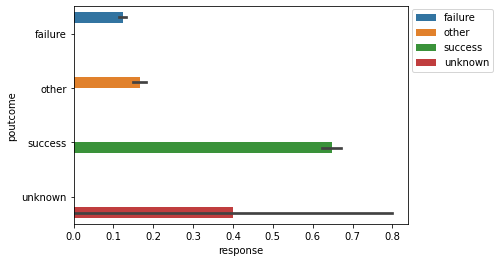

C:\Python new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


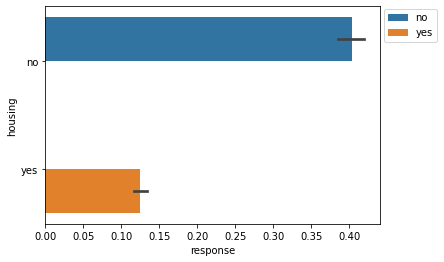

C:\Python new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


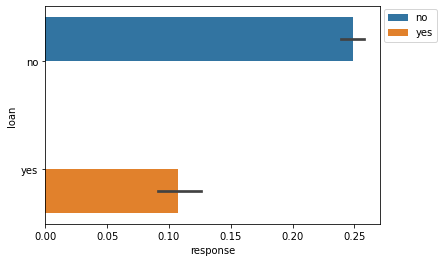

C:\Python new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


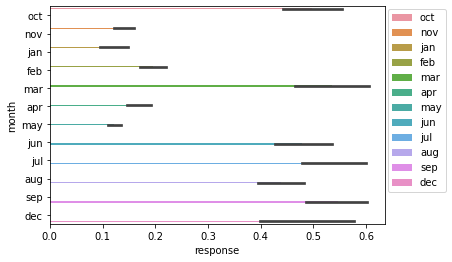

C:\Python new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


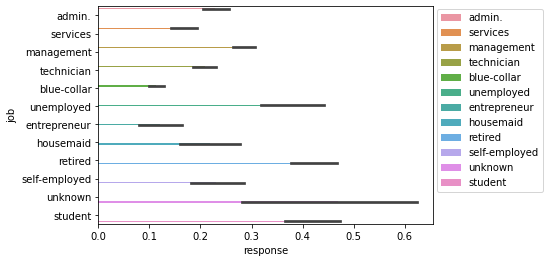

C:\Python new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


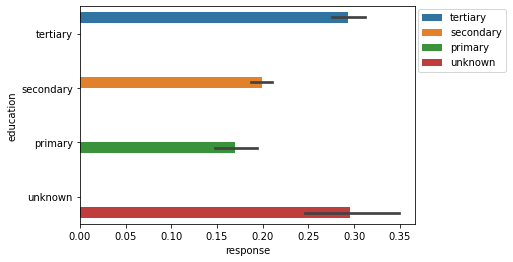

C:\Python new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


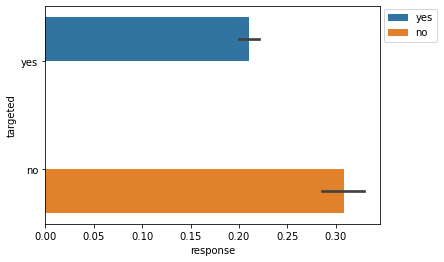

C:\Python new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


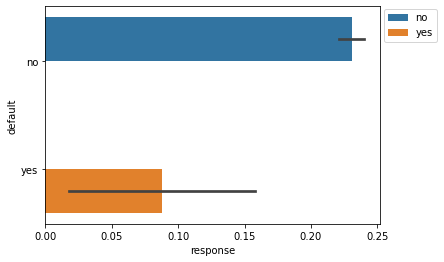

In [27]:
for i in df1[cat_cols]:
    sns.barplot(df1['response'], df1[i], hue = df1[i])
    plt.legend(bbox_to_anchor = (1.01,.99), borderaxespad = 0, loc = 2)
    plt.show()

## - b Are the features about the previous campaign data useful?
#### Yes previous campaign data is useful & pdays, poutcome is associated with the target variable 'response'

In [75]:
### The -1 pdays or ouliers are filtered out as we would not be using that in Modeling

####  The necessary transformations for the categorical variables and the numeric variables

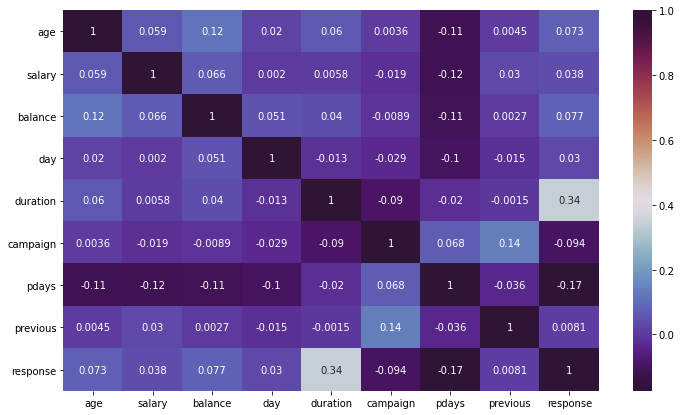

In [28]:
plt.figure(figsize=(12,7))
corr = df1.corr()
sns.heatmap(corr,annot=True, cmap = 'twilight_shifted')
plt.show()

In [ ]:
## NOTE:
## We see that duration variable is highly correlated with response variable.
## Where pdays variable is not highly correlated with response variable.

## Before the predictive modeling part, make sure to perform –

#### - The necessary transformations for the categorical variables and the numeric variables

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
df2 = df1[cat_cols].apply(LabelEncoder().fit_transform)

In [31]:
df2.head()

,contact,marital,poutcome,housing,loan,month,job,education,targeted,default
24060,1,1,0,0,0,10,0,2,1,0
24062,1,2,1,1,1,10,0,1,1,0
24064,1,1,0,1,0,10,7,1,1,0
24072,1,1,1,1,0,10,4,2,1,0
24077,1,1,0,1,0,10,4,2,1,0


###### all catagorical data is converted in numerical data

#### -Handle variables corresponding to the previous campaign

In [33]:
df3 = df2.join(df1[num_cols])

In [34]:
df3.head()

,contact,marital,poutcome,housing,loan,month,job,education,targeted,default,age,salary,balance,day,duration,campaign,pdays,previous,response
24060,1,1,0,0,0,10,0,2,1,0,33,50000,882,21,39,1,151,3,0
24062,1,2,1,1,1,10,0,1,1,0,42,50000,-247,21,519,1,166,1,1
24064,1,1,0,1,0,10,7,1,1,0,33,70000,3444,21,144,1,91,4,1
24072,1,1,1,1,0,10,4,2,1,0,36,100000,2415,22,73,1,86,4,0
24077,1,1,0,1,0,10,4,2,1,0,36,100000,0,23,140,1,143,3,1


In [35]:
df.corr()

,age,salary,balance,day,duration,campaign,pdays,previous
age,1.000000,0.024357,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
salary,0.024357,1.000000,0.055469,0.027864,-0.009937,0.015005,-0.014968,0.014564
balance,0.097783,0.055469,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.027864,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,-0.009937,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,0.015005,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,-0.014968,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.014564,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


#### - Train test split

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
np.random.seed(42)

In [37]:
X = df3.drop("response", axis=1)
X.head()

,contact,marital,poutcome,housing,loan,month,job,education,targeted,default,age,salary,balance,day,duration,campaign,pdays,previous
24060,1,1,0,0,0,10,0,2,1,0,33,50000,882,21,39,1,151,3
24062,1,2,1,1,1,10,0,1,1,0,42,50000,-247,21,519,1,166,1
24064,1,1,0,1,0,10,7,1,1,0,33,70000,3444,21,144,1,91,4
24072,1,1,1,1,0,10,4,2,1,0,36,100000,2415,22,73,1,86,4
24077,1,1,0,1,0,10,4,2,1,0,36,100000,0,23,140,1,143,3


In [38]:
y= df3[['response']]
y.head()

,response
24060,0
24062,1
24064,1
24072,0
24077,1


In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

## Predictive model 1: Logistic regression

#### Make a predictive model using logistic regression

In [40]:
lr = LogisticRegression()

In [42]:
import warnings
warnings.filterwarnings("ignore")

In [43]:
lr.fit(X_train,y_train)

LogisticRegression()

In [44]:
cv_score= cross_val_score(lr,X_train,y_train, cv=5)
np.mean(cv_score)

0.7783370562666023

In [45]:
y_pred = lr.predict(X_test)

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      1290
           1       0.56      0.23      0.32       351

    accuracy                           0.80      1641
   macro avg       0.69      0.59      0.60      1641
weighted avg       0.76      0.80      0.76      1641



In [48]:
confusion_matrix(y_pred,y_test)

array([[1228,  272],
       [  62,   79]], dtype=int64)

In [49]:
f1_score(y_pred,y_test)

0.32113821138211385

#### Use RFE to select top n features in an automated fashion (choose n as you see fit)

In [50]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rfe = RFE(lr, 5)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [51]:
rfe.support_

array([ True, False,  True,  True,  True, False, False, False, False,
        True, False, False, False, False, False, False, False, False])

In [52]:
X_train.columns[rfe.support_]

Index(['contact', 'poutcome', 'housing', 'loan', 'default'], dtype='object')

In [53]:
cols = X_train.columns[rfe.support_]

In [54]:
lr.fit(X_train[cols],y_train)

LogisticRegression()

In [55]:
y_pred2 = lr.predict(X_test[cols])

In [57]:
f1_score(y_pred2,y_test)

0.5402504472271914

In [58]:
confusion_matrix(y_pred2,y_test)

array([[1233,  200],
       [  57,  151]], dtype=int64)

#### - Using p values and VIF, get rid of the redundant features 

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,age,11.85
8,targeted,6.48
7,education,6.44
16,pdays,5.82
11,salary,5.34
1,marital,4.45
13,day,4.15
5,month,3.61
3,housing,3.27
15,campaign,2.87


###### Housing, loan, default, poutcome are imp feature from logistic regression model perspective

#### - Estimate the model performance using k fold cross validation

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [62]:
#Create Dependent and Independent Datasets based on our Dependent #and Independent features
model = svm.SVC()
accuracy = cross_val_score(model, X, y, scoring='accuracy', cv = 5)
print(accuracy)
#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

[0.77026204 0.77026204 0.77026204 0.77026204 0.76965265]
Accuracy of Model with Cross Validation is: 77.01401584399757


#### - What is the precision, recall, accuracy of your model?


In [63]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [64]:
print('Precision: %.3f' % precision_score(y_test, y_pred))

Precision: 0.560


In [65]:
print('Recall: %.3f' % recall_score(y_test, y_pred))

Recall: 0.225


In [66]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.796


## Predictive model 2: Random Forest

####  - Make a predictive model using random forest technique

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rfc = RandomForestClassifier(max_depth=5, random_state=42,max_leaf_nodes=50)

In [69]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=50, random_state=42)

In [70]:
cv1_score= cross_val_score(rfc,X_train,y_train, cv=5)
np.mean(cv1_score)

0.8389698233425594

In [71]:
y_pred1 = rfc.predict(X_test)

In [72]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1290
           1       0.74      0.47      0.57       351

    accuracy                           0.85      1641
   macro avg       0.80      0.71      0.74      1641
weighted avg       0.84      0.85      0.84      1641



In [73]:
f1_score(y_test,y_pred1)

0.5749128919860627

In [74]:
confusion_matrix(y_test,y_pred1)

array([[1232,   58],
       [ 186,  165]], dtype=int64)

In [75]:
from sklearn.metrics import roc_auc_score

In [76]:
roc_auc_score(y_test,y_pred1)

0.7125621148876963

#### - Use not more than 50 trees, and control the depth of the trees to prevent overfitting

In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [78]:
rf = RandomForestRegressor(n_estimators=50, min_samples_leaf=25)
rf.fit(X_train, y_train)
y_train_predicted = rf.predict(X_train)
y_test_predicted_pruned_trees = rf.predict(X_test)
mse_train = mean_squared_error(y_train, y_train_predicted)
mse_test = mean_squared_error(y_test, y_test_predicted_pruned_trees)
print("RF with pruned trees, Train MSE: {} Test MSE: {}".format(mse_train, mse_test))

RF with pruned trees, Train MSE: 0.09119007565039122 Test MSE: 0.10334660204080136


#### - Estimate the model performance using k fold cross validation

In [79]:
#Create Dependent and Independent Datasets based on our Dependent #and Independent features
model = svm.SVC()
accuracy = cross_val_score(model, X, y, scoring='accuracy', cv = 5)
print(accuracy)
#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

[0.77026204 0.77026204 0.77026204 0.77026204 0.76965265]
Accuracy of Model with Cross Validation is: 77.01401584399757


#### - What is the precision, recall, accuracy of your model?

In [81]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [82]:
print('Recall: %.3f' % recall_score(y_test, y_pred))

Recall: 0.225


In [83]:
print('Recall: %.3f' % recall_score(y_test, y_pred))

Recall: 0.225


In [84]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.796


#### - Using the feature importance values from the Random Forest module, identify the most important features for the model

In [85]:
# Housing, month, pdays, poutcome, duration are imp feature from RANDOM FOREST perspective.